# Wrangle Dog 

In [1]:
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import re

In [2]:
pd.set_option('display.max_columns',30)
pd.set_option('display.width', 100)

## 1. 收集

In [3]:
#数据1 - WeRateDogs的推特档案: 
twitter_archive_enhanced_df = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
twitter_archive_enhanced_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [5]:
#数据2 - 推特图像的预测数据:
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'

response = requests.get(url)

with open(url.split('/')[-1],mode='wb') as file:
              file.write(response.content)
        
image_predictions_df = pd.read_csv('image-predictions.tsv',delimiter='\t')

In [6]:
#数据3 - 每条推特的额外附加数据:
with open('tweet_json.txt',encoding='UTF-8') as file:
    data = file.readlines()
    
id_list = []
retweet_count_list = []
favorite_count_list= []

for i in range(len(data)):
    json_data=json.loads(data[i])
    
    id_list.append(json_data['id'])
        
    retweet_count_list.append(json_data['retweet_count'])
    
    favorite_count_list.append(json_data['favorite_count'])
    


tweet_json_df = pd.DataFrame([id_list,retweet_count_list,favorite_count_list]).T
tweet_json_df.columns=['tweet_id','retweet_count','favorite_count']

## 2. 评估

### (i). 目测评估

In [ ]:
twitter_archive_enhanced_df.to_excel('twitter_archive_enhanced_df.xlsx')

twitter_archive_enhanced_df

In [11]:
image_predictions_df.to_excel('image_predictions_df.xlsx')

image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [12]:
tweet_json_df.to_excel('tweet_json_df.xlsx')

tweet_json_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016
5,891087950875897856,3240,20548
6,890971913173991426,2142,12053
7,890729181411237888,19548,66596
8,890609185150312448,4403,28187
9,890240255349198849,7684,32467


#### 目测评估 - 质量:


- twitter_archive_enhanced_df表格:

     1. 第2335行的分子评级为1，分母评级为2 (上下滚动jupyter notebook中的twitter_archive_enhanced_df表格时候看到)。
     第313行的分子评级为00，分母评级为960。 (在Excel文件twitter_archive_enhanced_df.xlsx中看到)。
 
     2. in_reply_to_status_id列和in_reply_to_user_id列中有太多空值。 (打开jupyter notebook中的twitter_archive_enhanced_df时候注意到)
     
     
- image_predictions_df:

- tweet_json_df:

#### 目测评估 - 整洁度

- twitter_archive_enhanced_df表格:

    1. 有4个列标题是变量的值(doggo,floofer,pupper,puppo)，不是变量名称。(打开jupyter notebook中的twitter_archive_enhanced_df时候注意到)
 


- image_predictions_df:

- tweet_json_df:

### (ii). 编程评估

#### 编程评估 - 质量

- twitter_archive_enhanced_df 表格

In [72]:
twitter_archive_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

1.  expanded_urls列的有效数据的数量为2297，而不是2356。

2.  在doggo,floofer,pupper和puppo列中的空值用None字符串替代了。

3.  tweet_id和 timestamp的数据类型

In [14]:
#检查name列里有没有无效的名字
twitter_archive_enhanced_df['name'].value_counts()

None            745
a                55
Charlie          12
Lucy             11
Oliver           11
Cooper           11
Lola             10
Tucker           10
Penny            10
Bo                9
Winston           9
Sadie             8
the               8
Daisy             7
Bailey            7
Buddy             7
an                7
Toby              7
Jack              6
Stanley           6
Jax               6
Oscar             6
Dave              6
Bella             6
Rusty             6
Milo              6
Koda              6
Leo               6
Scout             6
Finn              5
               ... 
Kathmandu         1
Pancake           1
Noosh             1
Jerome            1
Ester             1
Cleopatricia      1
Socks             1
Flurpson          1
Jeffrie           1
Ivar              1
Augie             1
Stu               1
Hubertson         1
old               1
Barney            1
Baron             1
Peanut            1
Brian             1
Brockly           1


In [15]:
#检查light是不是无效名字
twitter_archive_enhanced_df[twitter_archive_enhanced_df['name'] == 'light']['text'].values[0]

'This is light saber pup. Ready to fight off evil with light saber. 10/10 true hero https://t.co/LPPa3btIIt'

4. name列里有light, a, an, the,quite等这类无效名字

In [16]:
#检查分母评级列里有没有无效的评级
twitter_archive_enhanced_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [17]:
#检查分母评级列不是10的评级是否有效
twitter_archive_enhanced_df[twitter_archive_enhanced_df['rating_denominator'] != 10]['text'].values

array(["@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",
       '@docmisterio account started on 11/15/15',
       'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
       'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
       'RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…',
       'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE',
       'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ',
       'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv',
       'Happy 4/20 from the

5. 分母评级列里7，11，15是无效评级，20和50的评级部分无效。

In [18]:
#检查4个地位列(doggo,floofer,pupper,puppo)里不是None的数据的数量

#提取每个地位列不是None的数据的数量，然后把4个结果加在一起赋值于名为notnone的变量
notnone =  twitter_archive_enhanced_df['doggo'].value_counts().loc['doggo']  + twitter_archive_enhanced_df['floofer'].value_counts().loc['floofer'] + twitter_archive_enhanced_df['pupper'].value_counts().loc['pupper'] + twitter_archive_enhanced_df['puppo'].value_counts().loc['puppo']

notnone

394

In [42]:
#先创建一个空列表kind。
#用正则表达式在text列里逐行提取重新含有地位(doggo|floof|pupper|puppo)的字符串，并放在kind列表里。
#用len(kind)查看kind的长度，然后对比notone，如果不一样代表原先4个地位列不完善

kind = []
for i in twitter_archive_enhanced_df['text']:
    d = re.search(r'doggo|floof|pupper|puppo',i)
    if d is not None:
        kind.append(d.group(0))
len(kind)

418

In [43]:
set(kind)

{'doggo', 'floof', 'pupper', 'puppo'}

6. 'doggo', 'floof', 'pupper', 'puppo'地位列不完善

In [60]:
#查看有没有转发（重复）的数据，即不同行但在'name','rating_numerator','rating_denominator','doggo','floofer','pupper','puppo'列中一样。
twitter_archive_enhanced_df[twitter_archive_enhanced_df['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [55]:
twitter_archive_enhanced_df[twitter_archive_enhanced_df[['name','rating_numerator','rating_denominator','doggo','floofer','pupper','puppo'
]].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None
42,884247878851493888,NaN,NaN,2017-07-10 03:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,NaN,NaN,NaN,https://twitter.com/kaijohnson_19/status/88396...,13,10,None,None,None,None,None
47,883117836046086144,NaN,NaN,2017-07-07 00:17:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please only send dogs. We don't rate mechanics...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883117836...,13,10,None,None,None,None,None
59,880872448815771648,NaN,NaN,2017-06-30 19:35:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ugh not again. We only rate dogs. Please don't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880872448...,12,10,None,None,None,None,None


In [46]:
twitter_archive_enhanced_df[twitter_archive_enhanced_df['name']=='Sierra']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [57]:
twitter_archive_enhanced_df[twitter_archive_enhanced_df['name']=='Canela']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None


In [58]:
twitter_archive_enhanced_df[twitter_archive_enhanced_df['name']=='Shadow']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
593,798925684722855936,NaN,NaN,2016-11-16 16:28:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shadow. He's a firm believer that they...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/798925684...,11,10,Shadow,None,None,None,None
1316,706644897839910912,NaN,NaN,2016-03-07 00:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. She's tired of the responsibiliti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706644897...,9,10,Shadow,None,None,None,None


7. 有转发（重复）的数据

In [141]:
#补充
twitter_archive_enhanced_df[twitter_archive_enhanced_df['tweet_id']==883482846933004288]['text'].values

array(['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'],
      dtype=object)

8. rating_numerator数据包含浮点，不是全部是整数。

- image_predictions_df

In [56]:
#补充1
print(image_predictions_df['jpg_url'].isnull().nunique(),(image_predictions_df['jpg_url']=='None').unique())
print(image_predictions_df['tweet_id'].isnull().nunique())
print(image_predictions_df['img_num'].isnull().nunique())



1 [False]
1
1


image_predictions_df的jpg_url列和tweet_id列无空值,所以image_predictions_df的数据都是包含图片的

- twitter_archive_enhanced_df

#### 编程评估 - 整洁度

In [64]:
twitter_archive_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [22]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


1.  这3个数据集以推特 ID 为观察对象，所以应该融为一个总数据集

### (iii).  评估总结

#### 1. 目测评估 - 质量:


- twitter_archive_enhanced_df表格:

     1. 第2335行的分子评级为1，分母评级为2 (上下滚动jupyter notebook中的twitter_archive_enhanced_df表格时候看到)。
     第313行的分子评级为00，分母评级为960。 (在Excel文件twitter_archive_enhanced_df.xlsx中看到)。
 
     2. in_reply_to_status_id列和in_reply_to_user_id列中有太多空值。 (打开jupyter notebook中的twitter_archive_enhanced_df时候注意到)
     
     
- image_predictions_df:

- tweet_json_df:

#### 2. 目测评估 - 整洁度：

- twitter_archive_enhanced_df表格:

    1. 有4个列标题是变量的值(doggo,floofer,pupper,puppo)，不是变量名称。(打开jupyter notebook中的twitter_archive_enhanced_df时候注意到)
 
 
- image_predictions_df:

- tweet_json_df

#### 3. 编程评估 - 质量:

- twitter_archive_enhanced_df表格:

    1. expanded_urls列的有效数据的数量为2297，而不是2356。

    2. 在doggo,floofer,pupper和puppo列中的空值用None字符串替代了。
    
    3. tweet_id和 timestamp的数据类型
    
    4. name列里有light, a, an, the,quite等这类无效名字。

    5. 分母评级列里7，11，15是无效评级，20和50的评级部分无效。

    6. 'doggo', 'floof', 'pupper', 'puppo'地位列不完善。
    
    7. 有转发（重复）的数据。
    
    8. rating_numerator数据包含浮点，不是全部是整数。(补充)


- image_predictions_df:

    1. tweet_id的数据类型


- tweet_json_df:

    1. tweet_id的数据类型

#### 4.编程评估 - 整洁度:

1.  这3个数据集以推特 ID 为观察对象，所以应该融为一个总数据集

## 3. 清理

In [7]:
twitter_archive_enhanced_df_clean = twitter_archive_enhanced_df.copy()
image_predictions_df_clean = image_predictions_df.copy()
tweet_json_df_clean = tweet_json_df.copy()

### (i). 质量问题

#### 问题描述一
第2335行的分子评级为1，分母评级为2, 第313行的分子评级为00，分母评级为960.

##### 定义
从twitter_archive_enhanced_df_clean表格中提取第2335行和第313行，在text列中找出正确数据后直接替换。

##### 代码

In [8]:
twitter_archive_enhanced_df_clean.iloc[313]['text']

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [9]:
twitter_archive_enhanced_df_clean.loc[313,'rating_numerator'] = 13

twitter_archive_enhanced_df_clean.loc[313,'rating_denominator'] = 10

In [10]:
twitter_archive_enhanced_df_clean.iloc[2335]['text']

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

In [11]:
twitter_archive_enhanced_df_clean.loc[2335,'rating_numerator'] = 9

twitter_archive_enhanced_df_clean.loc[2335,'rating_denominator'] = 10

##### 测试

In [12]:
twitter_archive_enhanced_df.loc[[313,2335],['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
313,960,0
2335,1,2


In [13]:
twitter_archive_enhanced_df_clean.loc[[313,2335],['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
313,13,10
2335,9,10


#### 问题描述二
in_reply_to_status_id列和in_reply_to_user_id列中有太多空值。

##### 定义
由于无法得到可以替补的数据，同时这次分析不会用到这两列，所以直接在twitter_archive_enhanced_df_clean中把这两列删除。

##### 代码

In [14]:
twitter_archive_enhanced_df_clean.drop(labels=['in_reply_to_status_id','in_reply_to_user_id'],axis=1,inplace=True)

##### 测试

In [15]:
twitter_archive_enhanced_df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [16]:
twitter_archive_enhanced_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text',
       'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [17]:
len(twitter_archive_enhanced_df_clean.columns)

15

In [18]:
len(twitter_archive_enhanced_df.columns)

17

#### 问题描述三
expanded_urls列的有效数据的数量为2297，而不是2356。

##### 定义
由于无法得到可以替补的数据，同时这次分析不会用expanded_urls列，所以直接在twitter_archive_enhanced_df_clean中把expanded_urls列删除。

##### 代码

In [19]:
twitter_archive_enhanced_df_clean.drop(labels=['expanded_urls'],axis=1,inplace=True)

##### 测试

In [20]:
len(twitter_archive_enhanced_df_clean.columns)

14

In [21]:
twitter_archive_enhanced_df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

#### 问题描述四
在twitter_archive_enhanced_df表格中, doggo,floofer,pupper和puppo列中的空值用None字符串替代了。

##### 定义
用np.nan代替doggo,floofer,pupper和puppo列中的None值

##### 代码

In [22]:
def tonan(x):
    if x == 'None':
        return np.nan
    else:
        return x
    
twitter_archive_enhanced_df_clean['doggo'] = twitter_archive_enhanced_df_clean['doggo'].apply(lambda x: tonan(x))
twitter_archive_enhanced_df_clean['floofer'] = twitter_archive_enhanced_df_clean['floofer'].apply(lambda x: tonan(x))
twitter_archive_enhanced_df_clean['pupper'] = twitter_archive_enhanced_df_clean['pupper'].apply(lambda x: tonan(x))
twitter_archive_enhanced_df_clean['puppo'] = twitter_archive_enhanced_df_clean['puppo'].apply(lambda x: tonan(x))

#### 测试

In [23]:
twitter_archive_enhanced_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 257.8+ KB


#### 问题描述五
twitter_archive_enhanced_df表格tweet_id和 timestamp的数据类型

##### 定义
将twitter_archive_enhanced_df_clean表格的tweet_id的数据类型改为string，

将image_predictions_df_clean表格的tweet_id的数据类型改为string，

将tweet_json_df_clean表格的tweet_id的数据类型改为string，

将twitter_archive_enhanced_df_clean表格的timestamp的数据类型改为datetime.

##### 代码

In [24]:
twitter_archive_enhanced_df_clean.tweet_id=twitter_archive_enhanced_df_clean.tweet_id.astype(str)
image_predictions_df_clean.tweet_id=image_predictions_df_clean.tweet_id.astype(str)
tweet_json_df_clean.tweet_id=tweet_json_df_clean.tweet_id.astype(str)

twitter_archive_enhanced_df_clean.timestamp = twitter_archive_enhanced_df_clean.timestamp.apply(lambda x: x[:-6])
twitter_archive_enhanced_df_clean.timestamp = twitter_archive_enhanced_df_clean.timestamp.apply(lambda x: pd.to_datetime(x))

#### 测试

In [25]:
twitter_archive_enhanced_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 257.8+ KB


In [26]:
image_predictions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [27]:
tweet_json_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null object
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


#### 问题描述六
在twitter_archive_enhanced_df表格中，name列里有light, a, an, the,quite等这类无效名字。

##### 定义
用None代替无效名字。

##### 代码

In [28]:
def toNone(x):
    if x[0].islower():
        return 'None'
    else:
        return x
    
twitter_archive_enhanced_df_clean['name'] = twitter_archive_enhanced_df_clean['name'].apply(lambda x: toNone(x))

#### 测试

In [29]:
invaild_name1=[]

for i in list(twitter_archive_enhanced_df['name'].values):
    if i[0].islower():
        invaild_name1.append(i)
        
len(invaild_name1)

109

In [30]:
invaild_name2=[]

for i in list(twitter_archive_enhanced_df_clean['name'].values):
    if i[0].islower():
        invaild_name2.append(i)
        
len(invaild_name2)

0

#### 问题描述七
在twitter_archive_enhanced_df表格中, 分母评级列里7，11，15是无效评级，20和50的评级部分无效。

##### 定义
1.在twitter_archive_enhanced_df_clean表格中提取分母评级列是7，11，15的行，然后在text列的值中提取适合的数据直接替换, 没有适合的数据就把该行的分子评级和分母评级换成np.nan。

2.在twitter_archive_enhanced_df_clean表格中提取分母评级列是20和50的行, 然后查看text列的值去确认该行的评级是否有效，如果无效就提取适合的数据直接替换，没有适合的数据就把该行的分子评级和分母评级换成np.nan。

##### 代码

##### 1

In [31]:
#提取twitter_archive_enhanced_df_clean表格中提取分母评级列是7的行，查看该行的'text'列。
print(twitter_archive_enhanced_df_clean[twitter_archive_enhanced_df_clean['rating_denominator'] == 7].index)
print('\n')
print(twitter_archive_enhanced_df_clean[twitter_archive_enhanced_df_clean['rating_denominator'] == 7]['text'].values)

Int64Index([516], dtype='int64')


['Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx']


In [32]:
#text中没有适合的数据
#把分子评级和分母评级换成np.nan
twitter_archive_enhanced_df_clean.loc[516,'rating_numerator'] = np.nan
twitter_archive_enhanced_df_clean.loc[516,'rating_denominator'] = np.nan

In [33]:
#提取twitter_archive_enhanced_df_clean表格中提取分母评级列是11的行，查看该行的'text'列。
print(twitter_archive_enhanced_df_clean[twitter_archive_enhanced_df_clean['rating_denominator'] == 11].index)
print('\n')
print(twitter_archive_enhanced_df_clean[twitter_archive_enhanced_df_clean['rating_denominator'] == 11]['text'].values)

Int64Index([784, 1068, 1662], dtype='int64')


['RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…'
 'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ'
 'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5']


In [34]:
#每一行适合的数据分别是14/10，14/10，10/10。
#把分子评级和分母评级换成适合的值。
twitter_archive_enhanced_df_clean.loc[784,'rating_numerator']=14
twitter_archive_enhanced_df_clean.loc[784,'rating_denominator']=10

twitter_archive_enhanced_df_clean.loc[1068,'rating_numerator']=14
twitter_archive_enhanced_df_clean.loc[1068,'rating_denominator']=10

twitter_archive_enhanced_df_clean.loc[1662,'rating_numerator']=10
twitter_archive_enhanced_df_clean.loc[1662,'rating_denominator']=10

In [35]:
#提取twitter_archive_enhanced_df_clean表格中提取分母评级列是15的行，查看该行的'text'列。
print(twitter_archive_enhanced_df_clean[twitter_archive_enhanced_df_clean['rating_denominator'] == 15].index)
print('\n')
print(twitter_archive_enhanced_df_clean[twitter_archive_enhanced_df_clean['rating_denominator'] == 15]['text'].values)

Int64Index([342], dtype='int64')


['@docmisterio account started on 11/15/15']


In [36]:
#text中没有适合的数据
#把分子评级和分母评级换成np.nan
twitter_archive_enhanced_df_clean.loc[342,'rating_numerator'] = 0
twitter_archive_enhanced_df_clean.loc[342,'rating_denominator'] = 0

##### 2

In [37]:
#在twitter_archive_enhanced_df_clean表格中提取分母评级列是20行, 然后查看text列的值去确认该行的评级是否有效。
#如果无效就提取适合的数据直接替换，没有适合的数据就把该行的分子评级和分母评级换成np.nan.
#第1165行的适合评级是13/10
print(twitter_archive_enhanced_df_clean[twitter_archive_enhanced_df_clean['rating_denominator'] == 20]['text'].index)
print('\n')
print(twitter_archive_enhanced_df_clean[twitter_archive_enhanced_df_clean['rating_denominator'] == 20]['text'].values)

Int64Index([1165, 1598], dtype='int64')


['Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a'
 "Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating"]


In [38]:
#第1165行的适合评级是13/10
#把第1165行的分子评级和分母评级换成13和10
twitter_archive_enhanced_df_clean.loc[342,'rating_numerator'] = 13
twitter_archive_enhanced_df_clean.loc[342,'rating_denominator'] = 10

#### 测试

In [39]:
twitter_archive_enhanced_df_clean['rating_denominator'].value_counts()

10.0     2339
50.0        3
80.0        2
20.0        2
150.0       1
110.0       1
90.0        1
130.0       1
70.0        1
170.0       1
120.0       1
16.0        1
40.0        1
Name: rating_denominator, dtype: int64

In [40]:
twitter_archive_enhanced_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

#### 问题描述八
 'doggo', 'floof', 'pupper', 'puppo'地位列不完善。

##### 定义
和问题十同时解决


#### 问题描述九
twitter_archive_enhanced_df表格里有转发（重复）的数据。
##### 定义
删除retweeted_status_id列不是空值的行，然后把retweeted_status_id，retweeted_status_user_id，retweeted_status_timestamp列删掉。 
##### 代码

In [41]:
retweeted_row = twitter_archive_enhanced_df_clean[twitter_archive_enhanced_df_clean['retweeted_status_id'].notnull()].index

retweeted_row

Int64Index([  19,   32,   36,   68,   73,   74,   78,   91,   95,   97,
            ...
             926,  937,  943,  949, 1012, 1023, 1043, 1242, 2259, 2260],
           dtype='int64', length=181)

In [42]:
twitter_archive_enhanced_df_clean.drop(retweeted_row,inplace = True)

In [43]:
twitter_archive_enhanced_df_clean.drop(['retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'],axis=1,inplace = True)

##### 测试

In [44]:
print(twitter_archive_enhanced_df.shape)
print('\n')
print(twitter_archive_enhanced_df_clean.shape)
print('\n')
print(twitter_archive_enhanced_df.shape[0]-twitter_archive_enhanced_df_clean.shape[0])


(2356, 17)


(2175, 11)


181


#### 问题描述十二（补充）
rating_numerator数据包含浮点，不是全部是整数

##### 定义
用正则表达式重新在twitter_archive_enhanced_df_clean表格的text列重新提取分子评级rating_numerator和分母评级rating_denominator。

##### 代码




In [45]:
rating = twitter_archive_enhanced_df_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']
twitter_archive_enhanced_df_clean['rating_numerator'] = rating['rating_numerator'].astype(float)
twitter_archive_enhanced_df_clean['rating_denominator'] = rating['rating_denominator'].astype(float)

#### 测试

In [46]:
print(twitter_archive_enhanced_df[twitter_archive_enhanced_df['tweet_id']==883482846933004288]['text'].values)

twitter_archive_enhanced_df[twitter_archive_enhanced_df['tweet_id']==883482846933004288][['rating_numerator','rating_denominator']]

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948']


,rating_numerator,rating_denominator
45,5,10


In [47]:
print(twitter_archive_enhanced_df_clean[twitter_archive_enhanced_df['tweet_id']==883482846933004288]['text'].values)

twitter_archive_enhanced_df_clean[twitter_archive_enhanced_df['tweet_id']==883482846933004288][['rating_numerator','rating_denominator']]

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948']


D:\APP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
D:\APP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,rating_numerator,rating_denominator
45,13.5,10.0


### (ii). 整洁度问题

#### 问题描述十
有4个列标题是变量的值(doggo,floofer,pupper,puppo)，不是变量名称。

##### 定义
对twitter_archive_enhanced_df_clean表格每一行中的text列使用正则表达式，重新提取含有‘地位’的字符串，读入一个名叫stage的列。
然后把'doggo', 'floofer', 'pupper', 'puppo'列删除

补充：

tweets记录包含不止一个stage值的情况，保留每一个出现的stage值，同时不同的值之间用符号隔开；
对于多stage值的情况，将多值记录单独表示为multiple

##### 代码

In [48]:
twitter_archive_enhanced_df_clean['stage'] = twitter_archive_enhanced_df_clean.text.str.lower().str.findall(r'(doggo|floof|pupper|puppo)') #取原始数据
twitter_archive_enhanced_df_clean['stage'] = twitter_archive_enhanced_df_clean.stage.apply(lambda x:set(x)) # 去重
twitter_archive_enhanced_df_clean['stage'] = twitter_archive_enhanced_df_clean.stage.apply(lambda x:';'.join(x)) # 含一个以上值的用分号隔开
twitter_archive_enhanced_df_clean['stage'] = twitter_archive_enhanced_df_clean.stage.replace('',np.nan) # 空数据设为Nan
twitter_archive_enhanced_df_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace = True) #数据处理完之后将源数据列删除


#wrong
#def re_extract(x):
#    d = re.search(r'doggo|floof|pupper|puppo',x)
#    if d is not None:
#        return d.group(0)
#    else:
#        return np.nan

#twitter_archive_enhanced_df_clean['stage'] = twitter_archive_enhanced_df_clean['text'].apply(lambda x: re_extract(x))

##### 测试

In [49]:
twitter_archive_enhanced_df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator', 'rating_denominator', 'name',
       'stage'],
      dtype='object')

In [50]:
twitter_archive_enhanced_df_clean['stage'].count()

412

In [51]:
twitter_archive_enhanced_df_clean['stage'].value_counts()

pupper          249
doggo            81
floof            36
puppo            31
pupper;doggo     10
floof;doggo       2
doggo;puppo       2
floof;pupper      1
Name: stage, dtype: int64

#### 问题描述十一
这3个数据集以推特 ID 为观察对象，所以应该融为一个总数据集
##### 定义
把twitter_archive_enhanced_df_clean，image_predictions_df_clean和tweet_json_df_clean数据集融为一个总数据集
##### 代码

In [52]:
#twitter_archive_enhanced_df_clean = pd.merge(left = twitter_archive_enhanced_df_clean,right=tweet_json_df_clean,on=['tweet_id'], how='left')

In [53]:
#补充
twitter_archive_enhanced_df_clean = pd.merge(left=twitter_archive_enhanced_df_clean,right=tweet_json_df_clean,on=['tweet_id'], how='inner')
twitter_archive_enhanced_df_clean = pd.merge(left=twitter_archive_enhanced_df_clean,right=image_predictions_df_clean,on=['tweet_id'], how='inner')

#twitter_archive_enhanced_df_clean = pd.merge(left = twitter_archive_enhanced_df_clean,right=tweet_json_df_clean,on=['tweet_id'], how='left')
#twitter_archive_enhanced_df_clean = pd.merge(left=twitter_archive_enhanced_df_clean,right=image_predictions_df_clean,on=['tweet_id'], how='left')

##### 测试

In [54]:
twitter_archive_enhanced_df_clean

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN,8842,39492,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,6480,33786,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,4301,25445,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN,8925,42863,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN,9721,41016,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13.0,10.0,None,NaN,3240,20548,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13.0,10.0,Jax,NaN,2142,12053,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13.0,10.0,None,NaN,19548,66596,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13.0,10.0,Zoey,NaN,4403,28187,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14.0,10.0,Cassie,doggo,7684,32467,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [55]:
twitter_archive_enhanced_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 21 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1994 non-null object
stage                 369 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 n

### 导出

In [79]:
twitter_archive_enhanced_df_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator', 'rating_denominator', 'rate_ratio',
       'stage', 'name', 'retweet_count', 'favorite_count', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'source'],
      dtype='object')

In [81]:
twitter_archive_enhanced_df_clean=twitter_archive_enhanced_df_clean[['tweet_id', 'timestamp', 'text', 
                                                                     'rating_numerator', 'rating_denominator',
                                                                     'stage','name',
                                                                     'retweet_count', 'favorite_count',
                                                                     'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
                                                                     'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
                                                                     'source'
                                                                    ]]

twitter_archive_enhanced_df_clean.to_csv('twitter_archive_master.csv',index = False)

## 4. 分析和可视化

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

与上面分析或可视化相关的见解或说明

In [83]:
twitter_archive_enhanced_df_clean['rate_ratio'] = twitter_archive_enhanced_df_clean['rating_numerator'] / twitter_archive_enhanced_df_clean['rating_denominator']

In [84]:
twitter_archive_enhanced_df_clean.groupby('stage').mean()[['rating_numerator','rating_denominator','rate_ratio','retweet_count','favorite_count']]

,rating_numerator,rating_denominator,rate_ratio,retweet_count,favorite_count
stage,,,,,
doggo,14.731343,12.388060,1.186567,6790.149254,18381.850746
doggo;puppo,13.000000,10.000000,1.300000,11432.000000,31960.500000
floof,13.823529,11.764706,1.170588,2872.882353,9093.735294
floof;doggo,9.500000,10.000000,0.950000,3736.000000,14612.000000
floof;pupper,11.000000,10.000000,1.100000,1520.000000,4511.000000
pupper,13.500132,12.599119,1.060586,2288.400881,7019.713656
pupper;doggo,11.000000,10.000000,1.100000,4061.555556,12484.666667
puppo,12.111111,10.000000,1.211111,6298.148148,21880.814815


In [85]:
set(twitter_archive_enhanced_df_clean[twitter_archive_enhanced_df_clean['stage']=='puppo']['rating_denominator'])

{10.0}

In [86]:
twitter_archive_enhanced_df_clean['stage'].value_counts()

pupper          227
doggo            67
floof            34
puppo            27
pupper;doggo      9
floof;doggo       2
doggo;puppo       2
floof;pupper      1
Name: stage, dtype: int64

见解1:

stage_stat表格展示了基于twitter_archive_enhanced_df_clean表格，每个'地位'值的平均分子评级(rating_numerator列)，平均分母评级(rating_denominator列)，平均分子与分母比例评级(rate_ratio), 平均转发数(retweet_count)，平均点赞数(favorite_count)。

在平均转发数和平均点赞数列中，'地位'值有puppo的狗得分都是最高，说明了puppo狗更受欢迎，用户们倾向于转发有关puppo狗的推特。在twitter_archive_enhanced_df_clean表格中puppo狗的分母评级都是10，所以WeRateDogs的博主在评分puppo狗时可能是比较认真的。同时puppo狗的平均分子与分母比例评级也是最高的(约为1.3和1.21)。

In [87]:
twitter_archive_enhanced_df_clean[twitter_archive_enhanced_df_clean['p1_conf']>0.6].groupby('p1_dog').describe()

rating_numerator                                                    rating_denominator  \
                  count       mean       std  min   25%   50%   75%    max              count   
p1_dog                                                                                          
False             206.0  10.262136  9.804888  0.0   8.0  10.0  12.0  144.0              206.0   
True              769.0  11.595280  6.617018  1.0  10.0  11.0  12.0  121.0              769.0   

                                                     ...   p3_conf                          \
             mean       std   min   25%   50%   75%  ...      mean       std           min   
p1_dog                                               ...                                     
False   10.533981  7.664063  10.0  10.0  10.0  10.0  ...  0.020541  0.022976  1.740170e-10   
True    10.468140  5.796626   2.0  10.0  10.0  10.0  ...  0.026424  0.027995  2.160900e-07   

                                               rate_ratio                                          \
             25%       50%       75%       max      count      mean       std  min  25%  50%  75%   
p1_dog                                                                                              
False   0.002163  0.014759  0.029392  0.105072      206.0  0.962136  0.291377  0.0  0.8  1.0  1.2   
True    0.004753  0.017183  0.039125  0.179107      769.0  1.107963  0.184052  0.2  1.0  1.1  1.2   

                  
             max  
p1_dog            
False   1.400000  
True    3.428571  

[2 rows x 72 columns]

In [88]:
twitter_archive_enhanced_df_clean[(twitter_archive_enhanced_df_clean['p1_conf']>0.6)&(twitter_archive_enhanced_df_clean['p1_dog']==True)].groupby('stage').mean()[['rating_numerator','rating_denominator','rate_ratio','retweet_count','favorite_count']]

,rating_numerator,rating_denominator,rate_ratio,retweet_count,favorite_count
stage,,,,,
doggo,11.954545,10.000000,1.195455,7476.136364,21187.636364
floof,15.190476,12.857143,1.176190,3080.809524,9438.904762
pupper,14.405109,13.043478,1.108989,2587.956522,8253.532609
pupper;doggo,11.000000,10.000000,1.100000,4499.142857,13430.142857
puppo,12.375000,10.000000,1.237500,5436.312500,20443.187500


In [89]:
twitter_archive_enhanced_df_clean[(twitter_archive_enhanced_df_clean['p1_conf']>0.6)&(twitter_archive_enhanced_df_clean['p1_dog']==True)]['stage'].value_counts()

pupper          92
doggo           22
floof           21
puppo           16
pupper;doggo     7
Name: stage, dtype: int64

In [90]:
twitter_archive_enhanced_df_clean[twitter_archive_enhanced_df_clean['p1_conf']>0.6]['p1'].value_counts()

golden_retriever               105
Pembroke                        59
Labrador_retriever              57
Chihuahua                       40
pug                             38
Samoyed                         26
Pomeranian                      26
French_bulldog                  22
chow                            21
toy_poodle                      20
malamute                        15
German_shepherd                 14
Maltese_dog                     13
seat_belt                       12
web_site                        11
cocker_spaniel                  11
Shetland_sheepdog               10
Shih-Tzu                         9
Great_Pyrenees                   9
Chesapeake_Bay_retriever         9
vizsla                           9
West_Highland_white_terrier      8
Cardigan                         8
Bernese_mountain_dog             8
basset                           7
Siberian_husky                   7
tennis_ball                      7
teddy                            7
beagle              

见解2:

大概率(概率>0.6)图片上没有狗的推特占了206条，有狗的占了768条，比例约为0.268，所以直接在twitter_archive_enhanced_df_clean表格分析有可能会出现偏差。不过即使在twitter_archive_enhanced_df_clean中p1_conf列大于0.6和p1_dog是True的行中进行基于'地位'的分析，结果和见解1中差不多。但是这些特定行中puppo狗出现地最少，而不是floof狗。


在大概率有狗的推特中，狗的种类最多的是黄金猎犬(golden_retriever)，有105条相关推特。第二多的是(彭布罗克威尔士柯基犬)Pembroke，有59条相关推特。第三多的是拉布拉多犬(Labrador_retriever)。

In [91]:
twitter_archive_enhanced_df_clean.loc[twitter_archive_enhanced_df_clean['rating_numerator'].sort_values(ascending=False).index]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,stage,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,source,rate_ratio
726,749981277374128128,2016-07-04 15:00:45,This is Atticus. He's quite simply America af....,1776.0,10.0,NaN,Atticus,2769,5594,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,"<a href=""https://about.twitter.com/products/tw...",177.600000
1718,670842764863651840,2015-11-29 05:52:33,After so many requests... here you go.\n\nGood...,420.0,10.0,NaN,None,9509,25673,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False,"<a href=""http://twitter.com/download/iphone"" r...",42.000000
848,731156023742988288,2016-05-13 16:15:54,Say hello to this unbelievably well behaved sq...,204.0,170.0,doggo,None,1427,4172,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False,"<a href=""http://twitter.com/download/iphone"" r...",1.200000
662,758467244762497024,2016-07-28 01:00:57,Why does this never happen at my front door......,165.0,150.0,NaN,None,2516,5297,https://pbs.twimg.com/ext_tw_video_thumb/75846...,1,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True,"<a href=""http://twitter.com/download/iphone"" r...",1.100000
1435,677716515794329600,2015-12-18 05:06:23,IT'S PUPPERGEDDON. Total of 144/120 ...I think...,144.0,120.0,pupper,None,1101,3310,https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg,1,teddy,0.662908,False,crib,0.031891,False,chow,0.025438,True,"<a href=""http://twitter.com/download/iphone"" r...",1.200000
1302,684225744407494656,2016-01-05 04:11:44,"Two sneaky puppers were not initially seen, mo...",143.0,130.0,pupper,None,239,1361,https://pbs.twimg.com/media/CX7br3HWsAAQ9L1.jpg,2,golden_retriever,0.203249,True,Samoyed,0.067958,True,Great_Pyrenees,0.065327,True,"<a href=""http://twitter.com/download/iphone"" r...",1.100000
1303,684222868335505415,2016-01-05 04:00:18,Someone help the girl is being mugged. Several...,121.0,110.0,pupper,None,1554,4198,https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg,1,soft-coated_wheaten_terrier,0.791182,True,cocker_spaniel,0.072444,True,teddy,0.071486,False,"<a href=""http://twitter.com/download/iphone"" r...",1.100000
946,713900603437621249,2016-03-27 01:29:02,Happy Saturday here's 9 puppers on a bench. 99...,99.0,90.0,pupper,None,827,3049,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1,golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True,"<a href=""http://twitter.com/download/iphone"" r...",1.100000
1494,675853064436391936,2015-12-13 01:41:41,Here we have an entire platoon of puppers. Tot...,88.0,80.0,pupper,None,1447,2903,https://pbs.twimg.com/media/CWEcxqWVEAAHyGH.jpg,1,Labrador_retriever,0.868367,True,golden_retriever,0.043305,True,vizsla,0.028207,True,"<a href=""http://twitter.com/download/iphone"" r...",1.100000
323,820690176645140481,2017-01-15 17:52:40,The floofs have been released I repeat the flo...,84.0,70.0,floof,None,3699,13476,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True,"<a href=""http://twitter.com/download/iphone"" r...",1.200000


In [92]:
twitter_archive_enhanced_df_clean.loc[twitter_archive_enhanced_df_clean['rating_denominator'].sort_values(ascending=False).index]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,stage,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,source,rate_ratio
848,731156023742988288,2016-05-13 16:15:54,Say hello to this unbelievably well behaved sq...,204.0,170.0,doggo,None,1427,4172,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False,"<a href=""http://twitter.com/download/iphone"" r...",1.200000
662,758467244762497024,2016-07-28 01:00:57,Why does this never happen at my front door......,165.0,150.0,NaN,None,2516,5297,https://pbs.twimg.com/ext_tw_video_thumb/75846...,1,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True,"<a href=""http://twitter.com/download/iphone"" r...",1.100000
1302,684225744407494656,2016-01-05 04:11:44,"Two sneaky puppers were not initially seen, mo...",143.0,130.0,pupper,None,239,1361,https://pbs.twimg.com/media/CX7br3HWsAAQ9L1.jpg,2,golden_retriever,0.203249,True,Samoyed,0.067958,True,Great_Pyrenees,0.065327,True,"<a href=""http://twitter.com/download/iphone"" r...",1.100000
1435,677716515794329600,2015-12-18 05:06:23,IT'S PUPPERGEDDON. Total of 144/120 ...I think...,144.0,120.0,pupper,None,1101,3310,https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg,1,teddy,0.662908,False,crib,0.031891,False,chow,0.025438,True,"<a href=""http://twitter.com/download/iphone"" r...",1.200000
1303,684222868335505415,2016-01-05 04:00:18,Someone help the girl is being mugged. Several...,121.0,110.0,pupper,None,1554,4198,https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg,1,soft-coated_wheaten_terrier,0.791182,True,cocker_spaniel,0.072444,True,teddy,0.071486,False,"<a href=""http://twitter.com/download/iphone"" r...",1.100000
946,713900603437621249,2016-03-27 01:29:02,Happy Saturday here's 9 puppers on a bench. 99...,99.0,90.0,pupper,None,827,3049,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1,golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True,"<a href=""http://twitter.com/download/iphone"" r...",1.100000
970,710658690886586372,2016-03-18 02:46:49,Here's a brigade of puppers. All look very pre...,80.0,80.0,pupper,None,633,2513,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1,soft-coated_wheaten_terrier,0.948617,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True,"<a href=""http://twitter.com/download/iphone"" r...",1.000000
1494,675853064436391936,2015-12-13 01:41:41,Here we have an entire platoon of puppers. Tot...,88.0,80.0,pupper,None,1447,2903,https://pbs.twimg.com/media/CWEcxqWVEAAHyGH.jpg,1,Labrador_retriever,0.868367,True,golden_retriever,0.043305,True,vizsla,0.028207,True,"<a href=""http://twitter.com/download/iphone"" r...",1.100000
323,820690176645140481,2017-01-15 17:52:40,The floofs have been released I repeat the flo...,84.0,70.0,floof,None,3699,13476,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True,"<a href=""http://twitter.com/download/iphone"" r...",1.200000
925,716439118184652801,2016-04-03 01:36:11,This is Bluebert. He just saw that both #Final...,50.0,50.0,NaN,Bluebert,246,2562,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True,"<a href=""http://twitter.com/download/iphone"" r...",1.000000


In [93]:
twitter_archive_enhanced_df_clean.loc[twitter_archive_enhanced_df_clean['rate_ratio'].sort_values(ascending=False).index]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,stage,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,source,rate_ratio
726,749981277374128128,2016-07-04 15:00:45,This is Atticus. He's quite simply America af....,1776.0,10.0,NaN,Atticus,2769,5594,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,"<a href=""https://about.twitter.com/products/tw...",177.600000
1718,670842764863651840,2015-11-29 05:52:33,After so many requests... here you go.\n\nGood...,420.0,10.0,NaN,None,9509,25673,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False,"<a href=""http://twitter.com/download/iphone"" r...",42.000000
385,810984652412424192,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24.0,7.0,NaN,Sam,1647,5904,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,"<a href=""http://twitter.com/download/iphone"" r...",3.428571
162,852226086759018497,2017-04-12 18:25:07,Meet General. He wasn't content with the quali...,14.0,10.0,NaN,General,7530,21318,https://pbs.twimg.com/ext_tw_video_thumb/85222...,1,prison,0.352793,False,dishwasher,0.110723,False,file,0.094112,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",1.400000
549,778408200802557953,2016-09-21 01:39:11,RIP Loki. Thank you for the good times. You wi...,14.0,10.0,NaN,None,4988,15089,https://pbs.twimg.com/media/Cs12ICuWAAECNRy.jpg,3,Pembroke,0.848362,True,Cardigan,0.108124,True,beagle,0.011942,True,"<a href=""http://twitter.com/download/iphone"" r...",1.400000
399,807621403335917568,2016-12-10 16:22:02,This is Ollie Vue. He was a 3 legged pupper on...,14.0,10.0,pupper,Ollie,4267,16179,https://pbs.twimg.com/media/CzU_YVGUUAA3Xsd.jpg,3,golden_retriever,0.873233,True,cocker_spaniel,0.033693,True,chow,0.020408,True,"<a href=""http://twitter.com/download/iphone"" r...",1.400000
36,884441805382717440,2017-07-10 15:58:53,"I present to you, Pup in Hat. Pup in Hat is gr...",14.0,10.0,NaN,None,5836,27443,https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg,1,Pembroke,0.993225,True,Cardigan,0.003216,True,Chihuahua,0.002081,True,"<a href=""http://twitter.com/download/iphone"" r...",1.400000
333,819004803107983360,2017-01-11 02:15:36,This is Bo. He was a very good First Doggo. 14...,14.0,10.0,doggo,Bo,42045,95138,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True,"<a href=""http://twitter.com/download/iphone"" r...",1.400000
113,864873206498414592,2017-05-17 16:00:15,We only rate dogs. Please don't send in Jesus....,14.0,10.0,NaN,None,9320,33537,https://pbs.twimg.com/media/DAClmHkXcAA1kSv.jpg,2,pole,0.478616,False,lakeside,0.114182,False,wreck,0.055926,False,"<a href=""http://twitter.com/download/iphone"" r...",1.400000
153,854120357044912130,2017-04-17 23:52:16,Sometimes you guys remind me just how impactfu...,14.0,10.0,pupper,None,8245,33792,https://pbs.twimg.com/media/C9px7jyVwAAnmwN.jpg,4,black-and-tan_coonhound,0.854861,True,Doberman,0.050792,True,bluetick,0.021762,True,"<a href=""http://twitter.com/download/iphone"" r...",1.400000


见解3：

从上面的表格可以看到，在twitter_archive_enhanced_df_clean表格中神经网络模型预测可能是狗而且分子评级最高数据在第733行。该行的分子评级为150，狗的种类是Labrador_retriever的概率是0.436，是Chihuahua的概率为0.114, 地位列是pupper.

在twitter_archive_enhanced_df_clean表格中神经网络模型预测可能是狗而且分母评级最高数据也在第733行。该行的分母评级为165.

在twitter_archive_enhanced_df_clean表格中神经网络模型预测可能是狗而且分子与分母比例评级最高数据在第558行。该行的分子与分母比例评级为150，狗的种类是Pomeranian的概率是0.47，是chow的概率是0.103.

### 可视化

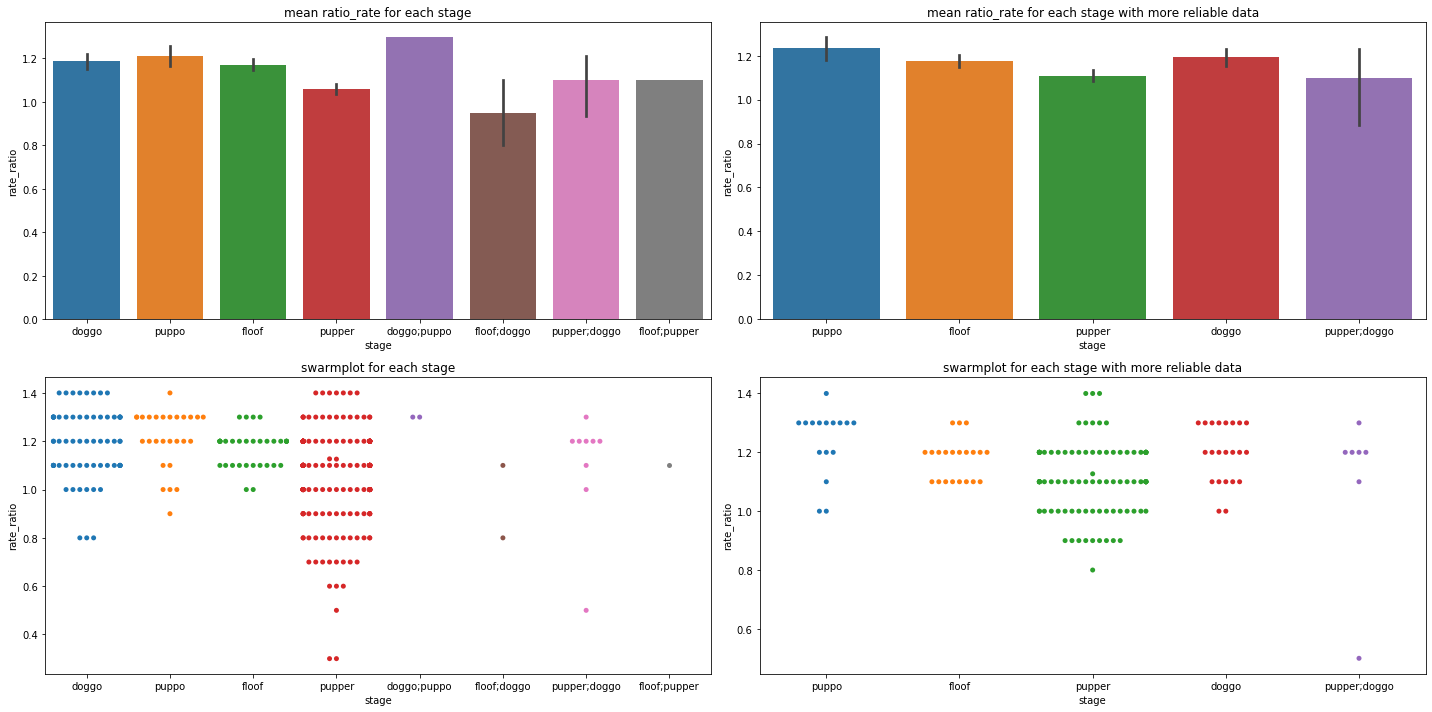

In [95]:
fig,axes = plt.subplots(nrows =2,ncols=2,figsize=(20,10))

sns.barplot(data=twitter_archive_enhanced_df_clean,x='stage',y='rate_ratio',ax=axes[0,0])
sns.barplot(data=twitter_archive_enhanced_df_clean[(twitter_archive_enhanced_df_clean['p1_conf']>0.6)&(twitter_archive_enhanced_df_clean['p1_dog']==True)],x='stage',y='rate_ratio',ax=axes[0,1])

sns.swarmplot(x='stage',y='rate_ratio',data=twitter_archive_enhanced_df_clean,ax=axes[1,0])
sns.swarmplot(x='stage',y='rate_ratio',data=twitter_archive_enhanced_df_clean[(twitter_archive_enhanced_df_clean['p1_conf']>0.6)&(twitter_archive_enhanced_df_clean['p1_dog']==True)],ax=axes[1,1])

axes[0,0].set_title("mean ratio_rate for each stage")
axes[0,1].set_title("mean ratio_rate for each stage with more reliable data")
axes[1,0].set_title("swarmplot for each stage")
axes[1,1].set_title("swarmplot for each stage with more reliable data")

plt.tight_layout()
fig.savefig(r'数据可视化1.jpg', dpi = 300)

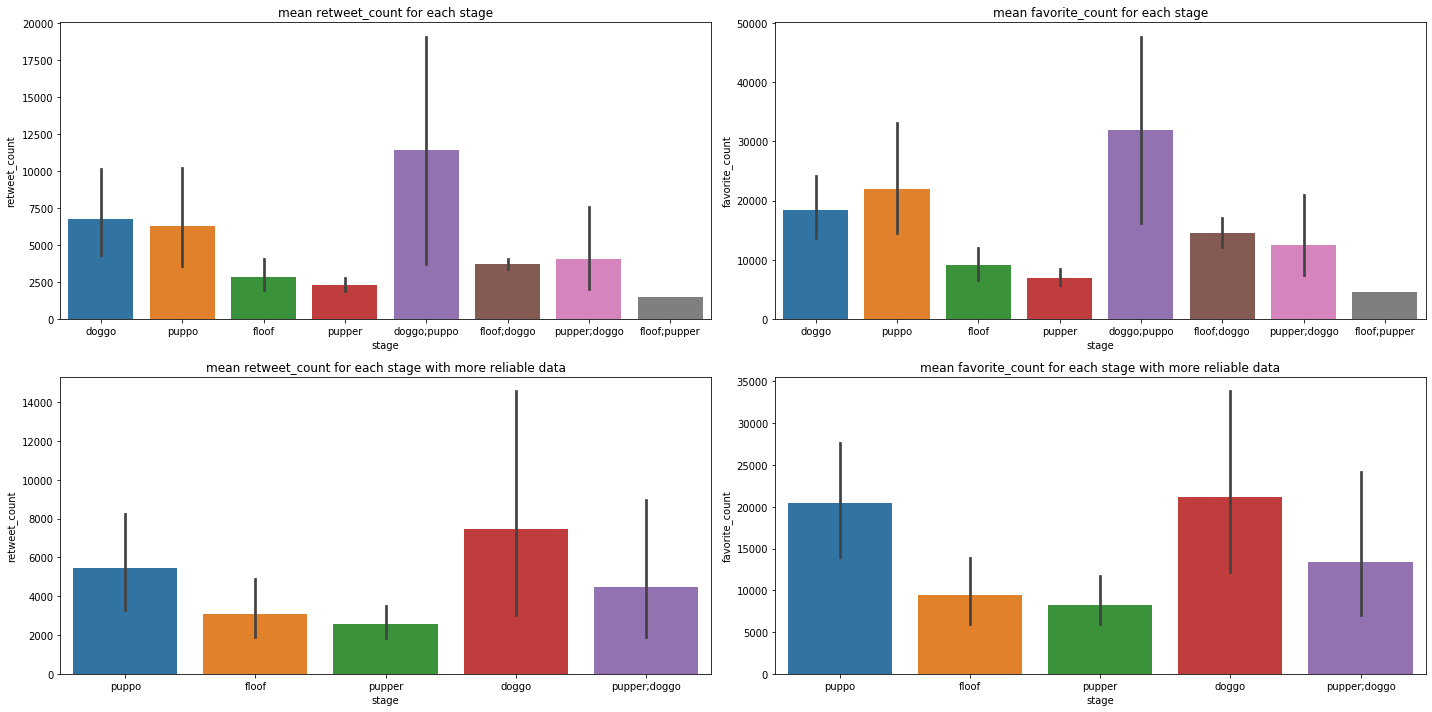

In [96]:
fig,axes = plt.subplots(nrows =2,ncols=2,figsize=(20,10))

sns.barplot(data=twitter_archive_enhanced_df_clean,x='stage',y='retweet_count',ax=axes[0,0])
sns.barplot(data=twitter_archive_enhanced_df_clean,x='stage',y='favorite_count',ax=axes[0,1])

sns.barplot(data=twitter_archive_enhanced_df_clean[(twitter_archive_enhanced_df_clean['p1_conf']>0.6)&(twitter_archive_enhanced_df_clean['p1_dog']==True)],x='stage',y='retweet_count',ax=axes[1,0])
sns.barplot(data=twitter_archive_enhanced_df_clean[(twitter_archive_enhanced_df_clean['p1_conf']>0.6)&(twitter_archive_enhanced_df_clean['p1_dog']==True)],x='stage',y='favorite_count',ax=axes[1,1])

axes[0,0].set_title("mean retweet_count for each stage")
axes[0,1].set_title("mean favorite_count for each stage")
axes[1,0].set_title("mean retweet_count for each stage with more reliable data")
axes[1,1].set_title("mean favorite_count for each stage with more reliable data")

plt.tight_layout()
fig.savefig(r'数据可视化2.jpg', dpi = 300)